# Trust Region Methods

In [4]:
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import plots as p
import algos
import functions as funcs

from functools import partial
import matplotlib.pyplot as plt

import autograd.numpy as np
from autograd import grad, jacobian, hessian

assert "autograd" in np.__file__ # Need to make sure that we get the correct numpy

# Cauchy Point + Dogleg

In [106]:
Q = funcs.gen_psd_matrix(2)
x0 = 9 * (np.random.random(2) - 0.5)

AssertionError: 

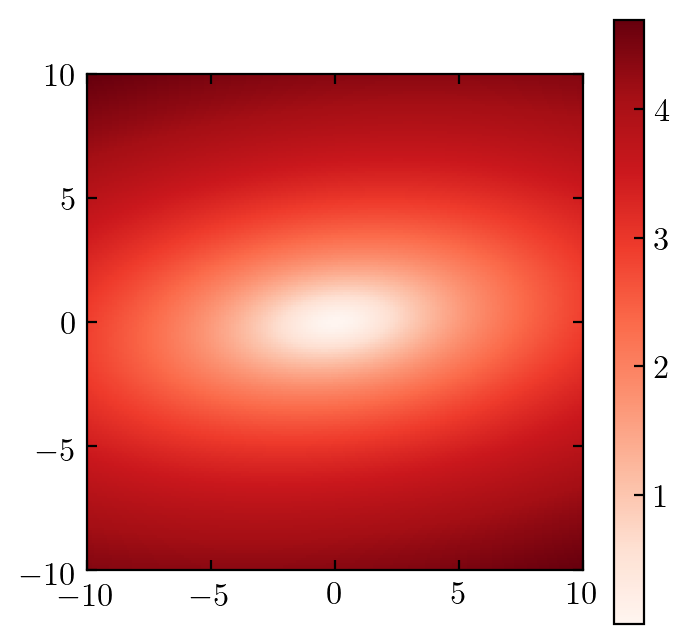

In [107]:
f = partial(funcs.f_one, Q)
ax = p.surface_2d(f, typ="image", lim=[-10, 10, -10, 10])

pos = algos.trust_region(f, grad(f), hessian(f), x0, algos.dogleg)
print(len(pos))
ax.plot(pos[:, 0], pos[:, 1])

In [16]:
print(f(x0), f(x0).shape)
print(grad(f)(x0).shape)
print(hessian(f)(x0).shape)

1.810651740363235 ()
(2,)
(2, 2)
